In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv(r'C:\Local D\Galeri Belajar\Project\ML Zoomcamp 2025\ml-zoomcamp-2025\03_classification\homework\data\bank\bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [77]:
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df[columns].head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [78]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Q1

In [79]:
df['education'].mode()[0]

'secondary'

# Q2

<Axes: >

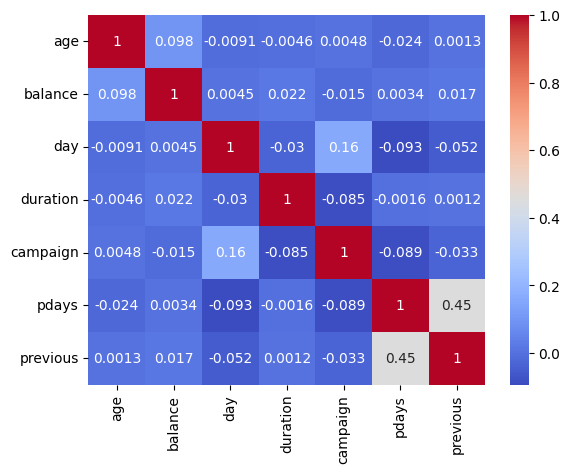

In [80]:
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

From the image we know that the biggest pair is pdays and previous

In [81]:
target = 'y'

In [82]:
df.y = (df.y == 'yes').astype(int)

In [83]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [84]:
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [85]:
df_train = df_train.drop(columns=[target]).reset_index(drop=True)
df_val = df_val.drop(columns=[target]).reset_index(drop=True)
df_test = df_test.drop(columns=[target]).reset_index(drop=True)

# Q3

In [86]:

from sklearn.metrics import mutual_info_score

In [87]:

def compute_mi(series):
    # use the correct dataframe name (df_train_full) and the target column 'y'
    return mutual_info_score(series, df_train_full['y'])

# apply to feature columns (exclude the target itself)
mi = df_train_full.drop(columns=['y']).apply(compute_mi)
mi = mi.sort_values(ascending=False)
mi

balance      0.103479
duration     0.095623
pdays        0.034775
poutcome     0.029257
month        0.024774
contact      0.014164
age          0.013488
previous     0.013151
housing      0.009800
job          0.007765
day          0.006033
campaign     0.004515
loan         0.002509
education    0.002458
marital      0.002019
default      0.000339
dtype: float64

-> Contact

# Q4

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# one-hot encode categorical variables, align train and val
X_train = pd.get_dummies(df_train, drop_first=True)
X_val = pd.get_dummies(df_val, drop_first=True)
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# fit logistic regression with required parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train.values, y_train)

# predict and evaluate
y_pred = model.predict(X_val.values)
acc = round(accuracy_score(y_val, y_pred), 2)
print("Validation accuracy (rounded to 2 decimals):", acc)

Validation accuracy (rounded to 2 decimals): 0.9


# Q5

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# baseline model (use all features)
X_train_all = pd.get_dummies(df_train, drop_first=True)
X_val_all = pd.get_dummies(df_val, drop_first=True)
X_train_all, X_val_all = X_train_all.align(X_val_all, join='left', axis=1, fill_value=0)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_all.values, y_train)
acc_orig = accuracy_score(y_val, model.predict(X_val_all.values))

features_to_test = ['age', 'balance', 'marital', 'previous']
results = {}

for feat in features_to_test:
    # drop the feature from copies of the dataframes
    X_train_tmp = df_train.drop(columns=[feat])
    X_val_tmp = df_val.drop(columns=[feat])

    # one-hot encode and align
    X_train_tmp = pd.get_dummies(X_train_tmp, drop_first=True)
    X_val_tmp = pd.get_dummies(X_val_tmp, drop_first=True)
    X_train_tmp, X_val_tmp = X_train_tmp.align(X_val_tmp, join='left', axis=1, fill_value=0)

    # train and evaluate
    model_tmp = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_tmp.fit(X_train_tmp.values, y_train)
    acc_tmp = accuracy_score(y_val, model_tmp.predict(X_val_tmp.values))

    # record difference (original - without_feature)
    diff = acc_orig - acc_tmp
    results[feat] = {'acc_without': acc_tmp, 'diff': diff}

# print results and the least useful feature (smallest diff)
for feat, info in results.items():
    print(f"{feat:8s}  acc_without={info['acc_without']:.4f}  diff={info['diff']:.4f}")

least_useful = min(results.items(), key=lambda x: x[1]['diff'])[0]
print("\nLeast useful feature (smallest difference):", least_useful)

age       acc_without=0.9006  diff=-0.0001
balance   acc_without=0.9004  diff=0.0001
marital   acc_without=0.9011  diff=-0.0007
previous  acc_without=0.9001  diff=0.0003

Least useful feature (smallest difference): marital


# Q5

In [90]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# prepare one-hot features and align
X_train = pd.get_dummies(df_train, drop_first=True)
X_val = pd.get_dummies(df_val, drop_first=True)
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

Cs = [0.01, 0.1, 1, 10, 100]
results = []

for C in Cs:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train.values, y_train)
    acc = accuracy_score(y_val, model.predict(X_val.values))
    acc_rounded = round(acc, 3)
    results.append((C, acc, acc_rounded))
    print(f"C={C:6}  acc={acc:.6f}  acc_rounded={acc_rounded:.3f}")

# choose best C (if tie, choose smallest C)
best_acc = max(r[1] for r in results)
best_cs = [r[0] for r in results if r[1] == best_acc]
best_C = min(best_cs)
best_acc_rounded = round(best_acc, 3)
print("\nBest C:", best_C, "validation accuracy (rounded to 3):", best_acc_rounded)

C=  0.01  acc=0.897810  acc_rounded=0.898
C=   0.1  acc=0.900907  acc_rounded=0.901
C=     1  acc=0.900464  acc_rounded=0.900
C=    10  acc=0.901239  acc_rounded=0.901
C=   100  acc=0.900575  acc_rounded=0.901

Best C: 10 validation accuracy (rounded to 3): 0.901
